# Final Project - Final Report

## By Quan Vo

### 12/16/22

In this final project, I have decided to use Steam as my topic and gather data from my Steam profile to determine the number of games that I've played and the number of games that I haven't played from my library. Throughout my years of using Steam, I have purchased many games from the store often during sales and because of that, I've always been curious as to how many of those purchased games still remain unplayed. I believe retrieving the data from my Steam profile and organizing it will help me draw a conclusion and could even bring some other insights during the process. I will be using the Steam [web API](https://steamcommunity.com/dev) to access my profile data and its contents. 

In [1]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests
import random

The first steps I needed to take was to find my Steam ID as well as obtain a Steam API key. My Steam ID is a 17-digit number that's located in the URL of my profile. As for the Steam API key, I needed to fill out a form on the Steam website in order to obtain a key. All it asked was to create a domain name and agree with the terms of use, then it would give me my own API key. Once I have both my key and my ID, I'll put them in a text file, and then read the contents of that text file using different variables.

In [2]:
keys = pd.read_csv("Steam-Keys.txt", header = 0, sep = ",")

In [3]:
steamApiKey = keys['Steam_Key'][0]
steamID = keys['Steam_ID'][0]

The next thing I needed to do was to find a Steam API link and then format that link. What I found was the [GetOwnedGames](https://developer.valvesoftware.com/wiki/Steam_Web_API#GetOwnedGames_.28v0001.29) method which will allow me to retrieve the list of games in my library. I'll use the given URL to initialize 'slink1' while also inserting my Steam ID and my API key in that URL.

In [4]:
slink1 = 'http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?key=' + str(steamApiKey) + '&steamid=' + str(steamID) + '&format=json'
slink2 = "&steamid=" + str(steamID) + "&include_appinfo=1&format=json"
slink = slink1 + steamApiKey + slink2

After defining my 'slink' variables, I'll make a variable called 'r' and use the requests.get() method to retrieve the data from 'slink.' Then I will convert the data from 'r' into a JSON so that I would be able to make my data frames.

In [5]:
r = requests.get(slink)
steam = r.json()
#steam

Everything in the JSON is nested inside the 'response' title, so the default data frame will just use 'response' as a column and only display 'game_count' and 'games.' I need to take some steps to format the data frame to get the information I need.

In [6]:
pd.DataFrame(steam)

,response
game_count,86
games,"[{'appid': 50, 'name': 'Half-Life: Opposing Fo..."


Putting ['response'] inside the parenthesis will separate 'game_count' and 'games' into their own column. As of right now, the only valuable information I have in this data frame is that it tells me that I have 86 games in my Steam library. What I want now is to display everything from the 'games' in their own data frame and separate each category into their own column.

In [7]:
steam_df = pd.DataFrame(steam['response'])
steam_df

,game_count,games
0,86,"{'appid': 50, 'name': 'Half-Life: Opposing For..."
1,86,"{'appid': 70, 'name': 'Half-Life', 'playtime_f..."
2,86,"{'appid': 130, 'name': 'Half-Life: Blue Shift'..."
3,86,"{'appid': 3830, 'name': 'Psychonauts', 'playti..."
4,86,"{'appid': 6910, 'name': 'Deus Ex: Game of the ..."
...,...,...
81,86,"{'appid': 1178880, 'name': 'Panzer Dragoon: Re..."
82,86,"{'appid': 966720, 'name': 'Pumped BMX Pro', 'p..."
83,86,"{'appid': 231430, 'name': 'Company of Heroes 2..."
84,86,"{'appid': 1818750, 'name': 'MultiVersus', 'pla..."


In [8]:
steam_df['games']

0     {'appid': 50, 'name': 'Half-Life: Opposing For...
1     {'appid': 70, 'name': 'Half-Life', 'playtime_f...
2     {'appid': 130, 'name': 'Half-Life: Blue Shift'...
3     {'appid': 3830, 'name': 'Psychonauts', 'playti...
4     {'appid': 6910, 'name': 'Deus Ex: Game of the ...
                            ...                        
81    {'appid': 1178880, 'name': 'Panzer Dragoon: Re...
82    {'appid': 966720, 'name': 'Pumped BMX Pro', 'p...
83    {'appid': 231430, 'name': 'Company of Heroes 2...
84    {'appid': 1818750, 'name': 'MultiVersus', 'pla...
85    {'appid': 1301210, 'name': 'Knockout City™', '...
Name: games, Length: 86, dtype: object

If I use the "list()" function and put "steam_df['games']" inside the parenthesis, it will create a data frame that lists all the information from 'games,' with every category separated into their own columns. This data frame lists every game that I own as well as the play time for each game. Now I have the data I need in order to find out how many games I've played in my library and how many I still haven't played.

In [9]:
games = pd.DataFrame(list(steam_df['games']))
games

,appid,name,playtime_forever,img_icon_url,playtime_windows_forever,playtime_mac_forever,playtime_linux_forever,rtime_last_played,has_community_visible_stats,has_leaderboards
0,50,Half-Life: Opposing Force,470,04e81206c10e12416908c72c5f22aad411b3aeef,0,0,0,1515201732,NaN,NaN
1,70,Half-Life,1401,95be6d131fc61f145797317ca437c9765f24b41c,0,0,0,1515103702,NaN,NaN
2,130,Half-Life: Blue Shift,233,b06fdee488b3220362c11704be4edad82abeed08,0,0,0,1515301292,NaN,NaN
3,3830,Psychonauts,1688,460b6471db7d83ee6943c1a87f7a9f2898634952,0,0,0,1520911660,True,NaN
4,6910,Deus Ex: Game of the Year Edition,0,03c8e5e89d83c536b44798e77ead5d813103991f,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
81,1178880,Panzer Dragoon: Remake,0,d00adb1a1a70663380eaa17a0835a9cf5931f23c,0,0,0,0,True,True
82,966720,Pumped BMX Pro,0,43013764d179d58f2bb2b6be317e67b715e252f7,0,0,0,0,True,NaN
83,231430,Company of Heroes 2,0,5e7e1866fb4f33a17393b0441cd1c750dbd91c5f,0,0,0,0,True,NaN
84,1818750,MultiVersus,197,b99e0727d4b37c022f33f8f72fada74c5108aac0,197,0,0,1661661046,True,NaN


I think most of the columns in my data frame aren't necessary to come up with a conclusion for my report, so I decided to remake the data frame by removing every column except for 'name' and 'playtime_forever.' Not only that, but I also set the data frame in order from most played to least played under the variable 'gameOrder.'

In [10]:
order = games.sort_values('playtime_forever', ascending=False)
gameOrder = order.drop(columns = ['appid', 'img_icon_url', 'playtime_windows_forever', 'playtime_mac_forever', 'playtime_linux_forever', 'rtime_last_played', 'has_community_visible_stats', 'has_leaderboards'])
gameOrder

,name,playtime_forever
20,Terraria,12234
64,Celeste,3202
34,Knytt Underground,2310
58,System Shock: Enhanced Edition,1695
3,Psychonauts,1688
...,...,...
50,Devil May Cry 4 Special Edition,0
51,Firewatch,0
52,Ori and the Blind Forest,0
53,Ori and the Blind Forest: Definitive Edition,0


I decided to experiment by creating different types of plots for my data frame to see which ones could be the most suitable for my analysis. The first plot I made is a histogram, and it shows that I have a lot of games in my library with 0 playtime. Initially, I thought that this histogram indicated that I have way more games in my Steam library that I have not played yet than there are games that I have actually played. Looking closely however, it looks like each bar has a width of around 1000 in terms of playtime, so the longest bar that's displayed includes games with either no playtime or the least amount of playtime in my library.

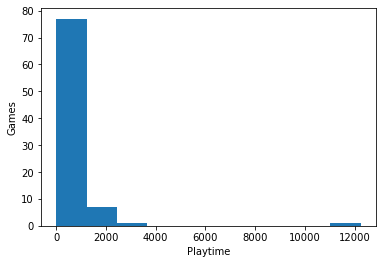

In [11]:
gameOrder['playtime_forever'].plot.hist()
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

The next plot I made is a bar graph and I decided to only show the first 20 entries as well as rotate the graph sideways so that you can read each title horizontally. As you can see, while there are plenty of games that I've played on Steam, Terraria is the game where I've put far more hours into my playtime than any other game in my library. What I would like to figure out now is how I can make a bar graph that shows one bar representing my unplayed games and another bar showing the games I've actually played.

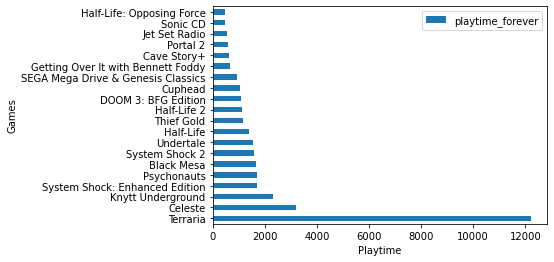

In [12]:
gameOrder.head(n=20).plot.barh(y='playtime_forever', x='name')
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

The last plot I made is a pie chart and I think this and the bar plot can be used to reach my conclusion as I tweak them further. As of right now, it only shows the playtime for each game in my library along with the percentages. Just like the bar graph, I would also like to figure out how I can make the pie chart only display one piece showing my unplayed games and another piece showing my played games.

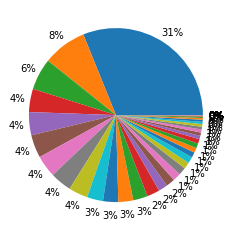

In [13]:
fig2, ax2 = plt.subplots()
ax2.pie(gameOrder['playtime_forever'], autopct='%1.0f%%', pctdistance=1.15)
plt.show()

Going further, I continued to edit my data frame so that it would be able show just two pieces of information, the played and unplayed games in my library. The first attempt I made was to try out the "pivot_table()" function, and what generated was the amount of times each value in 'playtime_forever' was repeated. I managed to retrieve the number of games with 0 playtime, which is 47, but games with a higher playtime value are all separated due to none of the values being the same. I would need to find a way to create a data frame that would count every game that has a playtime value higher than 0.

In [14]:
count = pd.DataFrame(gameOrder.pivot_table(columns=['playtime_forever'], aggfunc='size'))
count.head()

,0
playtime_forever,
0,47
4,1
5,1
11,1
22,1


For the next three cells, I decided to use "groupby()" and the "pd.cut()" function instead of sticking with "pivot_table()." This will allow me to sort the values in my data frame in different ranges using bins. I first used "pd.cut()" to count the number of games with a playtime value ranging from 1 to the 12234, which is the highest value in my data frame. It outputted a value of 39, indicating that I've played 39 out of the 86 games in my Steam library.

In [15]:
played = gameOrder.groupby(pd.cut(gameOrder['playtime_forever'], bins=[1, 12234])).count()
played

,name,playtime_forever
playtime_forever,,
"(1, 12234]",39,39


I then used that same function to count the amount of games with 0 playtime by having the bins range from -1 to 0. Just like the "pivot_table()" function, it once again shows that there are 47 out of 86 unplayed games in my Steam library.

In [16]:
unplayed = gameOrder.groupby(pd.cut(gameOrder['playtime_forever'], bins=[-1, 0])).count()
unplayed

,name,playtime_forever
playtime_forever,,
"(-1, 0]",47,47


Those two data frames only have one row each, so I used the "concat()" function to combine the two data frames as well as removing the extra 'playtime_forever' column using the "drop()" function. The final data frame result shows the two main values I'll use for my concluding graphs. "(1, 12234]" represents the games that I've played while "(-1, 0]" represents the games that I haven't played.

In [43]:
gameCount = [played, unplayed]
gameTotal = pd.concat(gameCount).drop(columns = ['playtime_forever'])
gameTotal

,name
playtime_forever,
"(1, 12234]",39
"(-1, 0]",47


I created a bar plot to compare the two values of my data frame and it shows my unplayed games having a higher value than my played games.

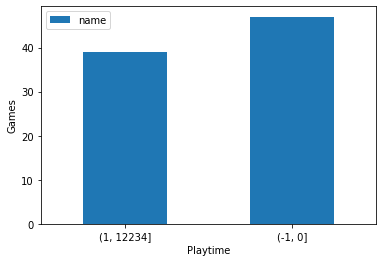

In [77]:
gameTotal.plot.bar(rot=0)
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

I decided to design the bar plot further by adding a title and changing the colors and labels of each bar. Because I wanted more insight as to how the values of my data frame compare to each other, I was hoping I'd be able to display the percentages for each bar. Unfortunately, I wasn't able to figure out how to do that so I simply left the graph as it is.

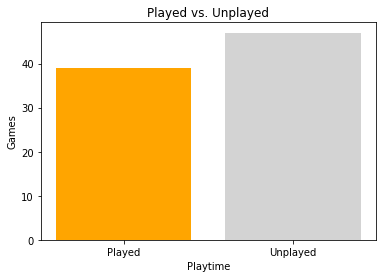

In [135]:
game = [39, 47]
playtime = ['Played', 'Unplayed']
plt.bar(playtime, game, color=('orange', 'lightgray'))
plt.title('Played vs. Unplayed')
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

Since I wanted to include percentages into my data for a more accurate assessment, I created a pie chart as my final graph to achieve that goal. According to the pie chart, I have played 45.3% of the games in my Steam library while 54.7% of my library still remain untouched.

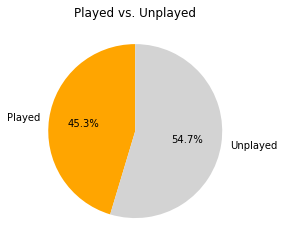

In [132]:
fig2, ax2 = plt.subplots()
ax2.pie(gameTotal['name'], labels = ['Played', 'Unplayed'], autopct = '%1.1F%%', colors = ['orange', 'lightgray'], startangle=90)
plt.title('Played vs. Unplayed')
plt.show()

Because of my personal habit of purchasing games on sale without playing them, both values in the pie chart are actually closer than I expected them to be. I initially expected the "Unplayed" category to be way higher than what it actually displayed, and I feel like the histogram I made in the beginning might've played a role in that thought process because of how one bar in that histogram is much higher than the rest.

Even though the amount of unplayed games is lower than I expected, there are probably a lot of games in my library that I have played, but also have a very low playtime value. If I added those games into my unplayed category, the value could significantly increase depending on how many hours I've spent on each game I've played. I know the first bar plot I made showed that Terraria is the only game where I've spent a large amount of hours playing, so that could indicate that I may also have a lot games in my library where I did play, but spent very little time on. It's speculations like these that could open the door for more opportunities to investigate the data in my Steam library.